In [3]:
import pandas as pd

# Load each file
df1 = pd.read_excel("Mahanadi.xlsx")
df1["River"] = "Mahanadi"

df2 = pd.read_excel("Krishna.xlsx")
df2["River"] = "Krishna"

df3 = pd.read_excel("Godavari.xlsx")
df3["River"] = "Godavari"

df4 = pd.read_excel("Cauvery.xlsx")
df4["River"] = "Cauvery"

# Merge them
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

df.head()


,Date,Discharge,flood runoff,daily runoff,weekly runoff,Flood,River
0,1998-01-01,1059.0,0.0,0.75,NaN,0.0,Mahanadi
1,1998-01-02,815.0,0.0,0.58,NaN,0.0,Mahanadi
2,1998-01-03,729.0,0.0,0.52,NaN,0.0,Mahanadi
3,1998-01-04,952.0,0.0,0.67,NaN,0.0,Mahanadi
4,1998-01-05,1070.0,0.0,0.76,NaN,0.0,Mahanadi


In [8]:
# Check info and missing values
df.info()
df.isnull().sum()

# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Make Flood binary (0/1)
df["Flood"] = (df["Flood"] > 0).astype(int)

df["Flood"] = (df["Flood"] > 0).astype(int)

X = df[["Discharge", "flood runoff", "daily runoff", "weekly runoff"]]
y = df["Flood"]

# Impute missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
x = imp.fit_transform(x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30680 entries, 0 to 30679
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           30680 non-null  datetime64[ns]
 1   Discharge      29867 non-null  float64       
 2   flood runoff   30680 non-null  float64       
 3   daily runoff   30680 non-null  float64       
 4   weekly runoff  30656 non-null  float64       
 5   Flood          30680 non-null  int32         
 6   River          30680 non-null  object        
dtypes: datetime64[ns](1), float64(4), int32(1), object(1)
memory usage: 1.5+ MB


In [9]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
cols = ["Discharge", "flood runoff", "daily runoff", "weekly runoff"]
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.9996740547588006
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6043
           1       1.00      0.98      0.99        93

    accuracy                           1.00      6136
   macro avg       1.00      0.99      0.99      6136
weighted avg       1.00      1.00      1.00      6136

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6043
           1       1.00      0.98      0.99        93

    accuracy                           1.00      6136
   macro avg       1.00      0.99      0.99      6136
weighted avg       1.00      1.00      1.00      6136



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9998370273794003
Random Forest Accuracy: 0.9998370273794003
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6043
           1       1.00      0.99      0.99        93

    accuracy                           1.00      6136
   macro avg       1.00      0.99      1.00      6136
weighted avg       1.00      1.00      1.00      6136



In [18]:
df["Flood_Predicted"] = rf.predict(X)

df.groupby("River")["Flood_Predicted"].sum()


River
Cauvery     153
Godavari    102
Krishna     111
Mahanadi     97
Name: Flood_Predicted, dtype: int32

In [27]:
# Decision Tree Predictions on full dataset
df["DT_Predicted"] = tree.predict(X)

# Random Forest Predictions on full dataset
df["RF_Predicted"] = rf.predict(X)


In [28]:
dt_counts = df.groupby("River")["DT_Predicted"].sum()
rf_counts = df.groupby("River")["RF_Predicted"].sum()

print("Decision Tree Flood Counts:\n", dt_counts)
print("\nRandom Forest Flood Counts:\n", rf_counts)


Decision Tree Flood Counts:
 River
Cauvery     152
Godavari    102
Krishna     111
Mahanadi     97
Name: DT_Predicted, dtype: int32

Random Forest Flood Counts:
 River
Cauvery     153
Godavari    102
Krishna     111
Mahanadi     97
Name: RF_Predicted, dtype: int32


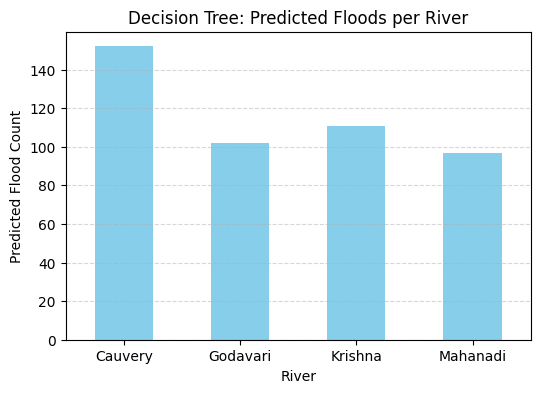

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
dt_counts.plot(kind="bar", color="skyblue")
plt.title("Decision Tree: Predicted Floods per River")
plt.xlabel("River")
plt.ylabel("Predicted Flood Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


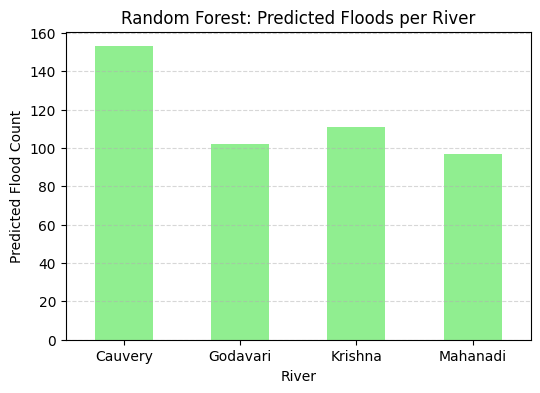

In [30]:
plt.figure(figsize=(6,4))
rf_counts.plot(kind="bar", color="lightgreen")
plt.title("Random Forest: Predicted Floods per River")
plt.xlabel("River")
plt.ylabel("Predicted Flood Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


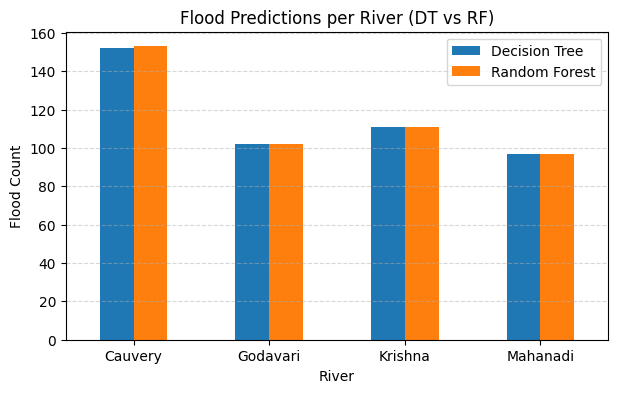

In [31]:
comparison = pd.DataFrame({
    "Decision Tree": dt_counts,
    "Random Forest": rf_counts
})

comparison.plot(kind="bar", figsize=(7,4))
plt.title("Flood Predictions per River (DT vs RF)")
plt.ylabel("Flood Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


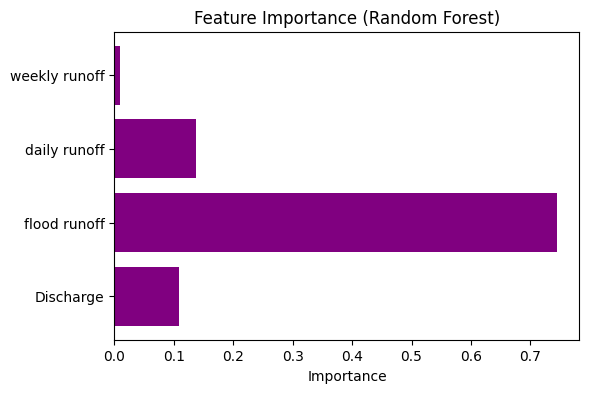

In [25]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = ["Discharge", "flood runoff", "daily runoff", "weekly runoff"]

plt.figure(figsize=(6,4))
plt.barh(features, importances, color="purple")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.show()


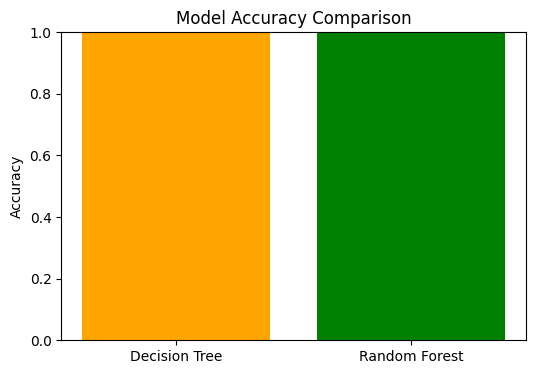

In [21]:
import matplotlib.pyplot as plt

models = ["Decision Tree", "Random Forest"]
accuracies = [
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_rf)
]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=['orange', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


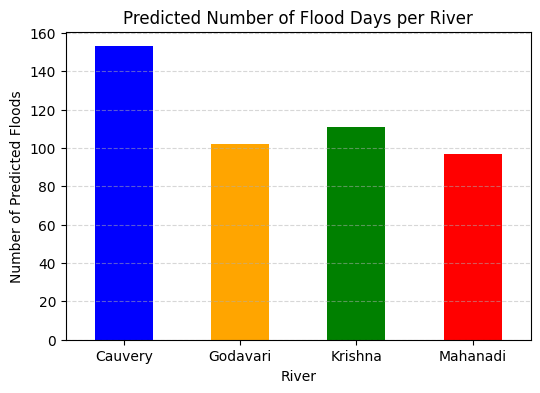

In [23]:
plt.figure(figsize=(6,4))
river_counts = df.groupby("River")["Flood_Predicted"].sum()
river_counts.plot(kind="bar", color=["blue", "orange", "green", "red"])
plt.title("Predicted Number of Flood Days per River")
plt.xlabel("River")
plt.ylabel("Number of Predicted Floods")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()
